In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
print(os.listdir("."))

['.ipynb_checkpoints', 'Breast Cancer Detection.ipynb', 'Breast Cancer Detection.py', 'Data Selection Proposal.pdf', 'data.csv', 'MAIS 202 - Deliverable 2.pdf']


In [3]:
#Read CSV file
data = pd.read_csv("data.csv")

In [4]:
#Understand the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
#Remove unecessary data
data = data.drop(['Unnamed: 32', 'id'], axis = 1)

#Create my label vector
y = data.diagnosis

#Create my feature matrix
data = data.drop('diagnosis', axis = 1)
x = data
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant:  212


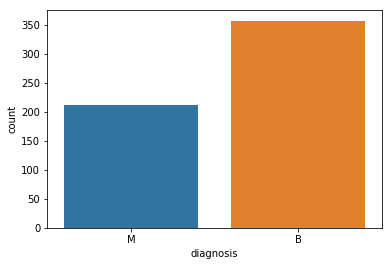

In [7]:
#Get to know the data
histogram = sns.countplot(y)
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant: ', M)

In [8]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization


In [10]:
#Draw violin plot
def violinplot(start, end):
    data = pd.concat([y,data_n_2.iloc[:,start:end]],axis=1)
    data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
    plt.xticks(rotation=90)

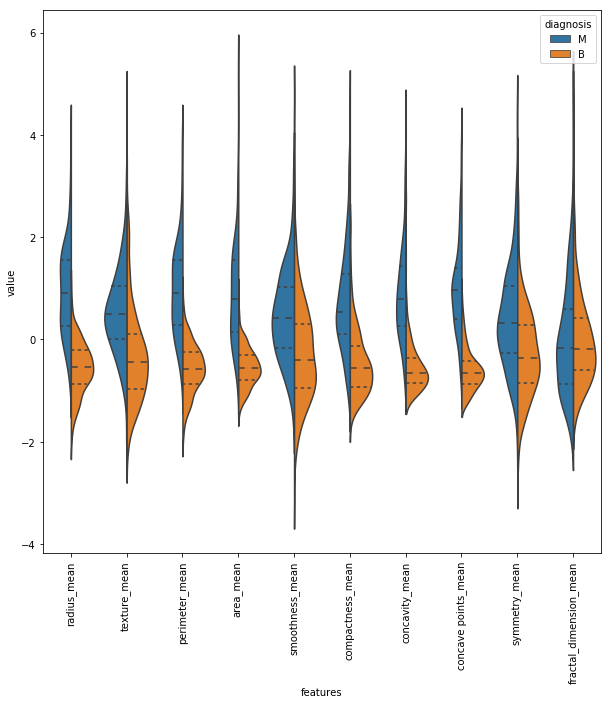

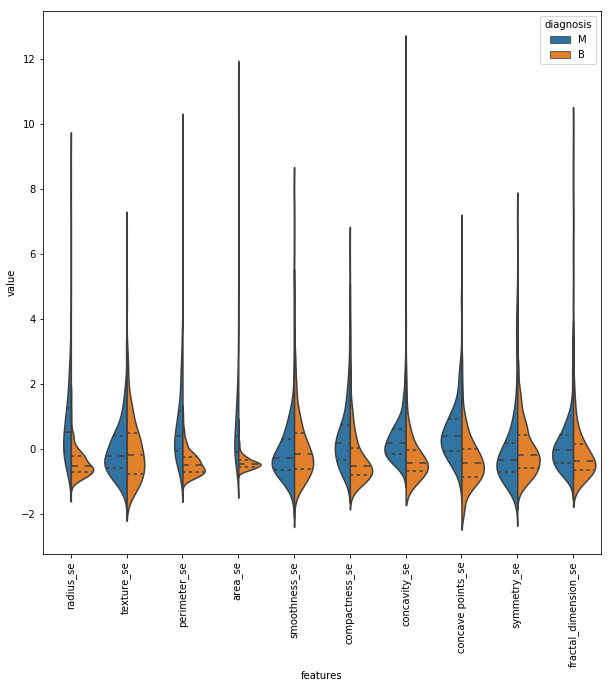

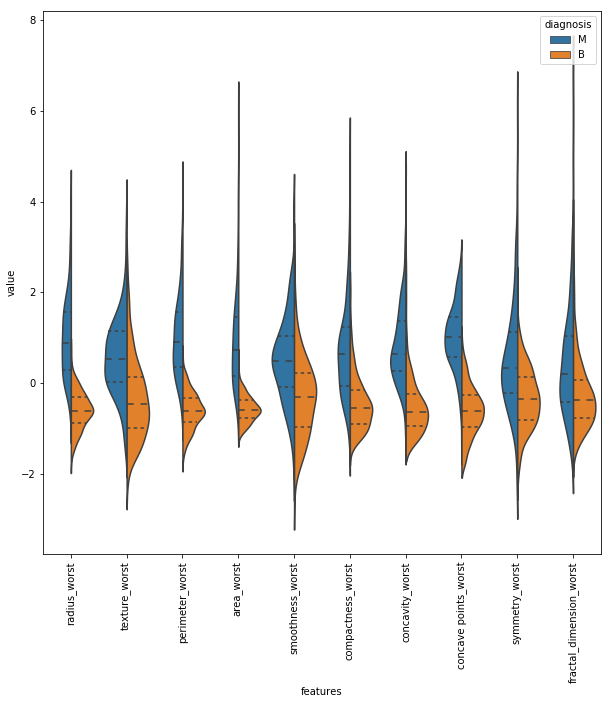

In [11]:
violinplot(0,10)
violinplot(10,20)
violinplot(20,31)


In [12]:
#Draw boxplot
def boxplot(start, end):
    data = pd.concat([y,data_n_2.iloc[:,start:end]],axis=1)
    data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(8,8))
    sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
    plt.xticks(rotation=90)

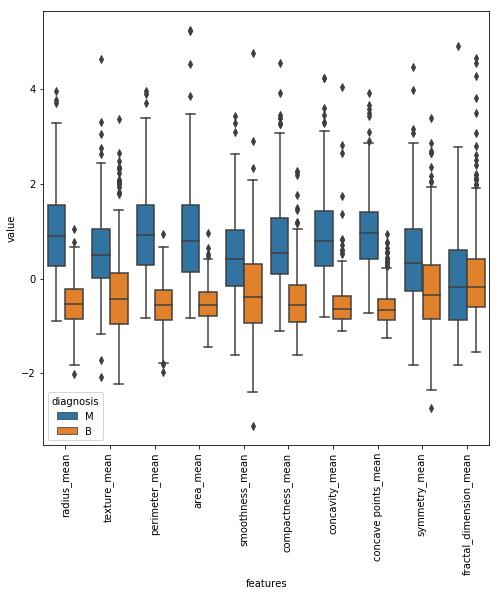

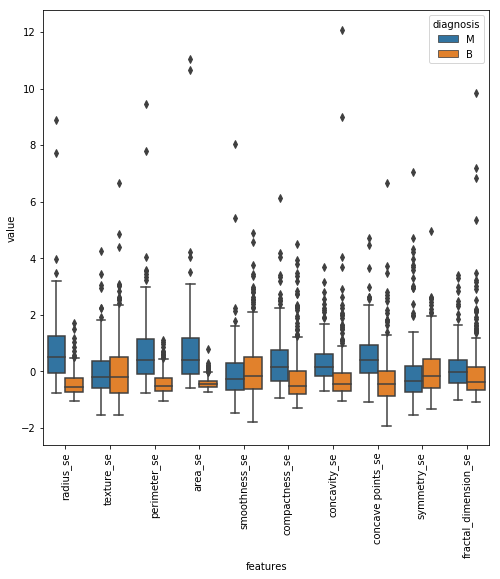

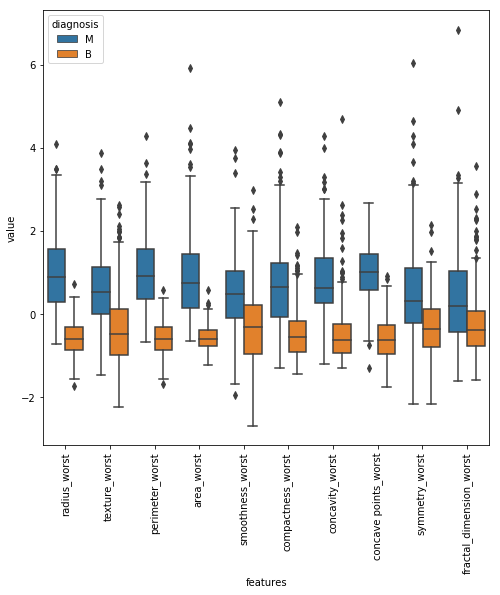

In [13]:
boxplot(0,10) #mean values
boxplot(10,20) #se
boxplot(20,31) #worst

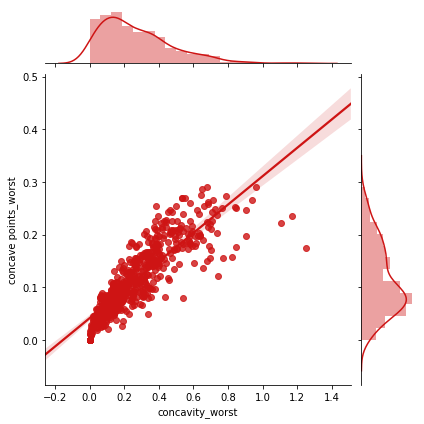

In [14]:
#Draw joint plot
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="regg", color="#ce1414")

In [15]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())  #Standardize


In [16]:
#Draw swarm Plot
def swarmPlot(start, end):
    data = pd.concat([y,data_n_2.iloc[:,start:end]],axis=1)
    data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
    plt.figure(figsize=(10,10))
    sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
    plt.xticks(rotation=90)

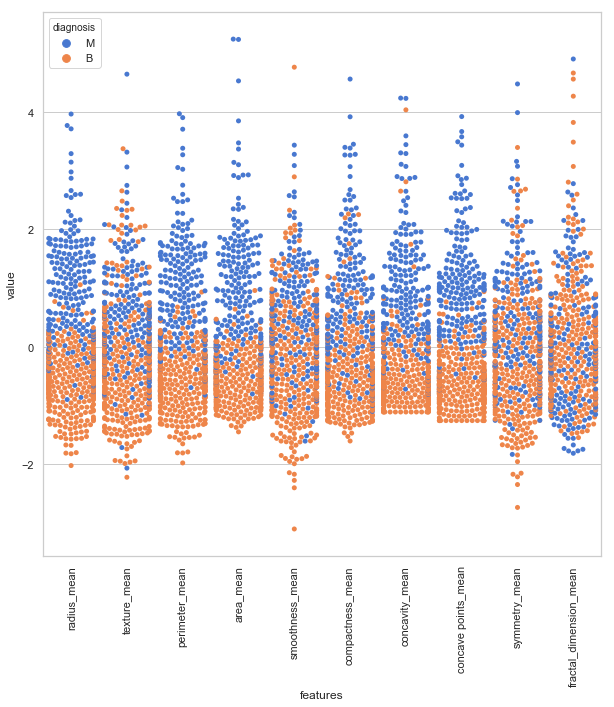

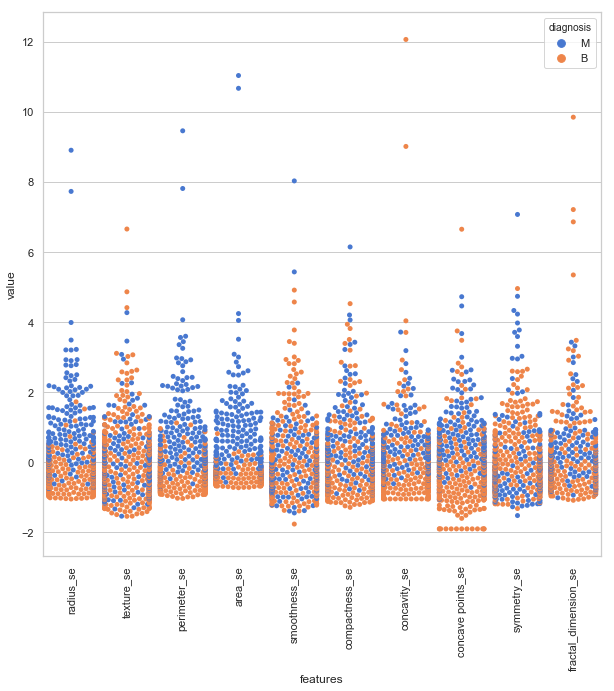

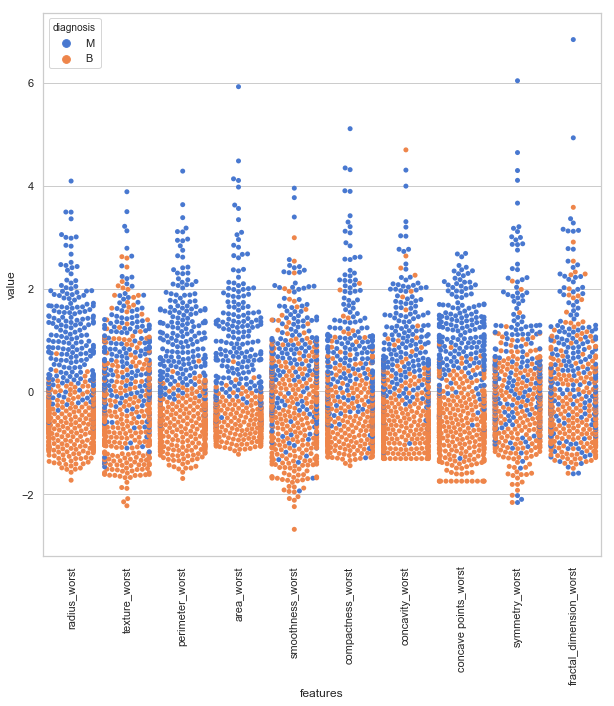

In [17]:
swarmPlot(0,10)
swarmPlot(10,20)
swarmPlot(20,31)


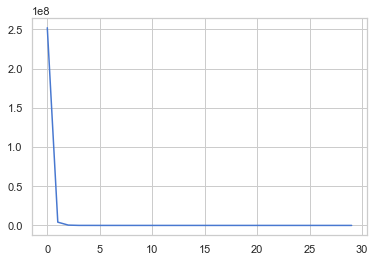

In [18]:
X = (x.values)

X_average_row = np.average(X, axis=0)
X_bar = X - X_average_row
sigma = X_bar.T.dot(X_bar)

eigenvalues, _ = np.linalg.eig(sigma)

plt.plot(np.arange(len(eigenvalues)), eigenvalues)
plt.show()


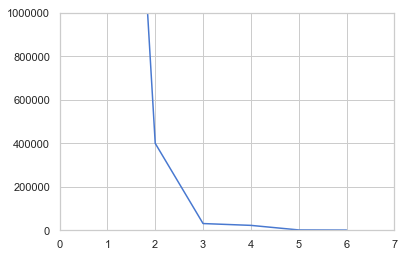

In [19]:
plt.plot(np.arange(7), eigenvalues[:7])
axes = plt.gca()
axes.set_xlim([0, 7])
axes.set_ylim([0,10e5])
plt.show()

In [20]:
#Drop "bad features" and test others using correlation heat map
possible_features = x.drop(['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis = 1)
possible_features_1 = possible_features.iloc[:,:6]
possible_features_2 = possible_features.iloc[:,6:12]
possible_features_3 = possible_features.iloc[:,12:]

print(possible_features_1.columns)
print(possible_features_2.columns)
print(possible_features_3.columns)

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean'],
      dtype='object')
Index(['radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se'],
      dtype='object')
Index(['radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


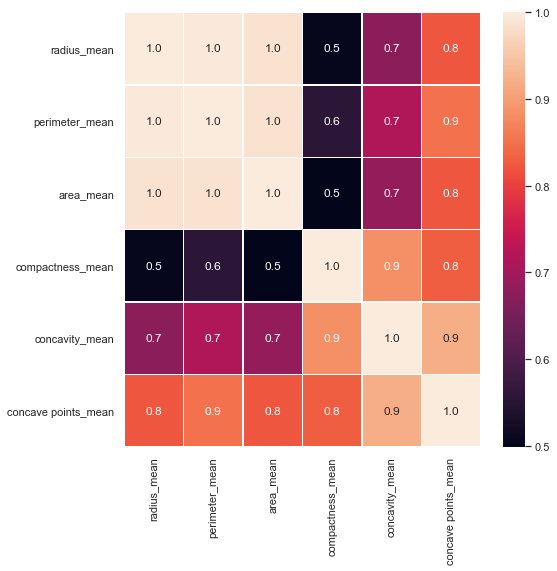

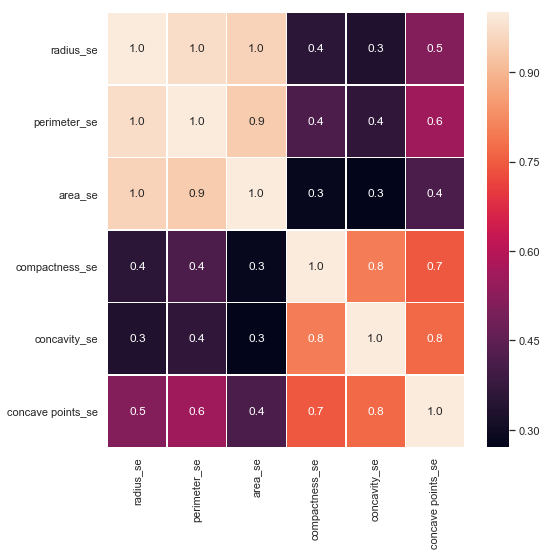

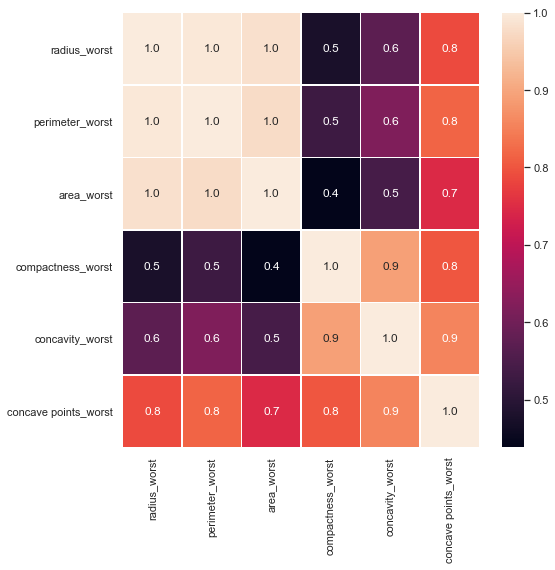

In [21]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(possible_features_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(possible_features_2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(possible_features_3.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [22]:
drop_list_RandF = ['area_mean', 'radius_mean', 'compactness_mean', 'area_se', 'radius_se', 'compactness_se', 'area_worst', 'radius_worst', 'compactness_worst' ]
x_1 = x.drop(drop_list_RandF, axis = 1)
x_1.head()

,texture_mean,perimeter_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,122.80,0.11840,0.3001,0.14710,0.2419,0.07871,0.9053,8.589,0.006399,...,0.01587,0.03003,0.006193,17.33,184.60,0.1622,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,0.08474,0.0869,0.07017,0.1812,0.05667,0.7339,3.398,0.005225,...,0.01340,0.01389,0.003532,23.41,158.80,0.1238,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,0.10960,0.1974,0.12790,0.2069,0.05999,0.7869,4.585,0.006150,...,0.02058,0.02250,0.004571,25.53,152.50,0.1444,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,0.14250,0.2414,0.10520,0.2597,0.09744,1.1560,3.445,0.009110,...,0.01867,0.05963,0.009208,26.50,98.87,0.2098,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,0.10030,0.1980,0.10430,0.1809,0.05883,0.7813,5.438,0.011490,...,0.01885,0.01756,0.005115,16.67,152.20,0.1374,0.4000,0.1625,0.2364,0.07678


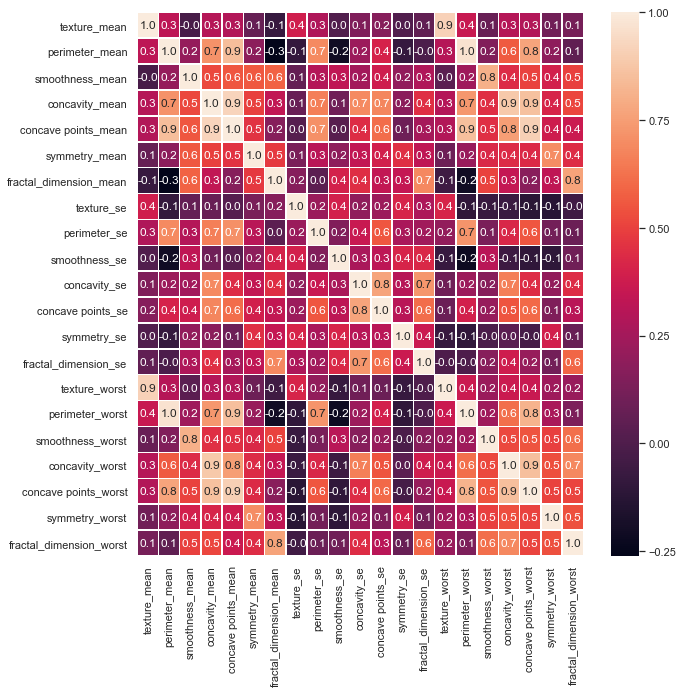

In [23]:
#Heat map to check correlation values
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 240 tasks      | elapsed:    4.3s


Training Accuracy is:  0.9874371859296482
Test Accuracy is:  0.9649122807017544


[Parallel(n_jobs=2)]: Done 648 out of 648 | elapsed:   11.8s finished


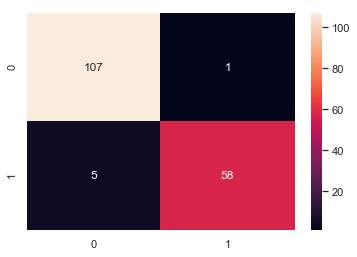

In [31]:
#Random Forest model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# Split 70% train 30% test
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3) #random_state=20

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 8, 12],
    'max_features': [1, 2, "auto"],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3],
    'n_estimators': [8, 10, 12, 14]
}

#Create the model to tune
clf_rf = RandomForestClassifier()
clf_gridsearch = GridSearchCV(estimator = clf_rf, param_grid = param_grid, cv = 3, verbose=1, n_jobs=2)

#Fit the model
clr_gridsearch = clf_gridsearch.fit(x_train,y_train)

#Predict
ac_t = accuracy_score(y_train,clr_gridsearch.predict(x_train))
print('Training Accuracy is: ',ac_t)
ac = accuracy_score(y_test,clr_gridsearch.predict(x_test))
print('Test Accuracy is: ',ac)
cm = confusion_matrix(y_test,clr_gridsearch.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")